In [1]:
import m_01_baseline as bl
from keras.models import load_model
import sound_processing as sp
import data_loader as dl
from IPython.display import Audio
import os
import consts
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

Using TensorFlow backend.


In [2]:
model = load_model('../weights/weights-improvement-20-0.76.hdf5')

In [10]:
train_df, valid_df = dl.load_train_data('../data/train/audio/*/**.wav', '../data/train/validation_list.txt')

There are 57929 train and 6798 validate samples


In [11]:
silence = dl.get_silence(train_df)

/usr/local/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [3]:
consts.LABELS

['yes',
 'no',
 'up',
 'down',
 'left',
 'right',
 'on',
 'off',
 'stop',
 'go',
 'silence',
 'unknown']

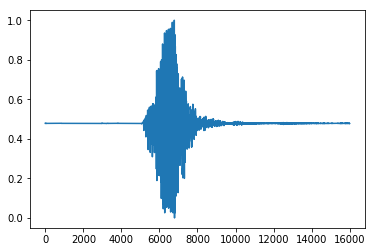

In [12]:
s = dl.process_wav_file('../data/train/audio/left/0132a06d_nohash_3.wav', silence)
plt.plot(s[:,0])
Audio(s[:,0], rate=consts.L)

'no'

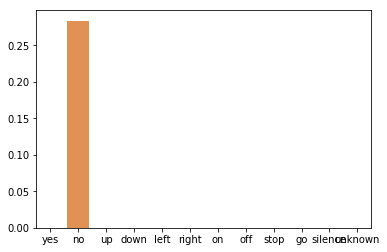

In [8]:
prediction = model.predict(s.reshape(1,consts.L, 1))[0]
sns.barplot(list(consts.LABELS), prediction)
consts.id2name[np.argmax(prediction)]

In [15]:
t,v=dl.get_sample_data(train_df, valid_df, n=10)

In [56]:
preds = []
for i, row in v.iterrows():
    sound = dl.process_wav_file(row.wav_file, silence)
    prediction = model.predict(sound.reshape(1,consts.L, 1))[0]
    preds.append(prediction)

In [58]:
preds = np.array(preds)

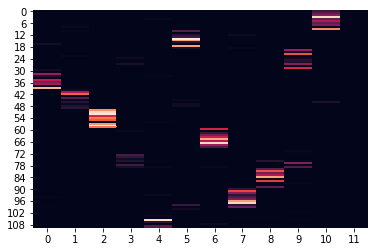

In [64]:
sns.heatmap(preds, cbar=False)

In [69]:
v['pred_label_id'] = preds.argmax(axis=1)

In [78]:
label_to_id = v.groupby('label').agg(np.median)['pred_label_id'].astype('int32').to_dict()
label_to_id

{'down': 0,
 'go': 7,
 'left': 1,
 'no': 5,
 'off': 5,
 'on': 6,
 'right': 2,
 'stop': 8,
 'unknown': 4,
 'up': 9,
 'yes': 10}

In [81]:
id_to_label = {}
for k in label_to_id:
    id_to_label[label_to_id[k]] = k
id_to_label

{0: 'down',
 1: 'left',
 2: 'right',
 4: 'unknown',
 5: 'off',
 6: 'on',
 7: 'go',
 8: 'stop',
 9: 'up',
 10: 'yes'}

down


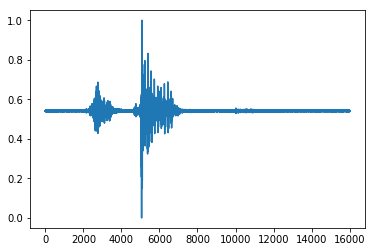

In [90]:
s = dl.process_wav_file('../data/test/audio/clip_55682fd66.wav', silence)
plt.plot(s[:,0])
print(id_to_label[prediction])
prediction = np.argmax(model.predict(s.reshape(1,consts.L, 1))[0])
Audio(s[:,0], rate=consts.L)

In [93]:
from glob import glob

In [99]:
l = glob('../data/test/audio/*wav')


In [104]:
len(l)

158538